#### Q1.1

Please see attached pdf Q1.1

#### Q1.2

A histogram puts all samples between the boundaries does not differentiate whether the point is close to the edge or at center.KDE plot in contrary, takes individual sample value and draws a gaussian bell curve over it. The final bell curve is aggregation of all these small curves. Thus KDE curve is bit wider.

Histogram can be used for a quick check of teh distribution of data, but very sensitive to the number of bins. The pattern thus based on bin size can be subjective. 
KDE on other side as responds to individual point is smoth and accurate distribution it shows. 

For high dinesionality of data KDE works better than histogram , for real high density data KDE too does not perform very well.


#### Q1.3

Please see attached pdf Q1.3

### Q2

In [286]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import scipy.sparse.linalg as ll
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import seaborn as sns

In [287]:
sns.set_theme()
file=os.path.join('data','n90pol.csv')

In [288]:
df=pd.read_csv(file)
df

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5
...,...,...,...
85,0.0174,-0.0242,2
86,0.0251,-0.0087,3
87,0.0676,0.0120,2
88,-0.0097,-0.0239,3


In [289]:
data=np.array(df)
orientation= data[:,2]
data=data[:,0:2]
amygdala=data[:,0]
acc=data[:,1]

#### Q2.a

Text(0.5, 1.0, 'acc histogram')

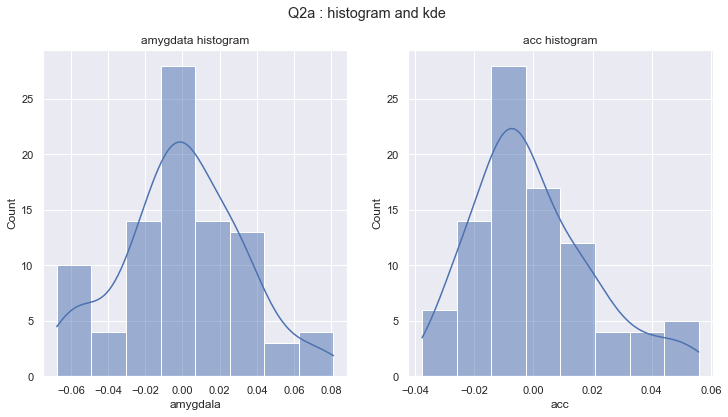

In [298]:
fig, axes= plt.subplots(1,2,figsize=(12,6))
fig.suptitle("Q2a : histogram and kde")
sns.histplot(ax=axes[0],data=df,x="amygdala",kde=True,bins=8)
sns.histplot(ax=axes[1],data=df,x="acc",kde=True,bins=8)
axes[0].set_title('amygdata histogram')
axes[1].set_title('acc histogram')

The 8 bins shows the  distribution clearly. Most of the time sns package optimizes the bin size and numbers based on the range of the data.

#### Q2.b

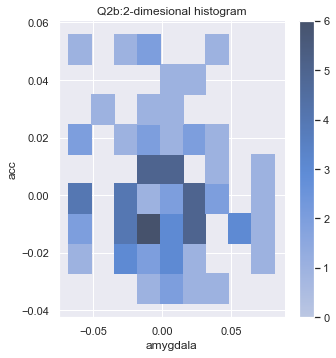

In [291]:
sns.displot(data=df,y="acc",x="amygdala",kind='hist', cbar=True, bins=9).set(title="Q2b:2-dimesional histogram")

#### Q2.c

<AxesSubplot:xlabel='amygdala', ylabel='acc'>

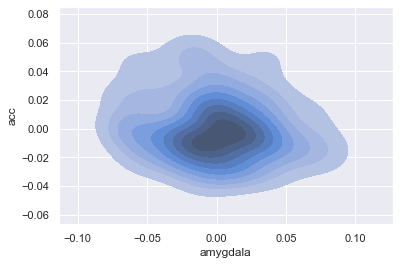

In [292]:
sns.kdeplot(data=df, y='acc',x='amygdala',fill=True)

<AxesSubplot:xlabel='None-acc', ylabel='amygdala'>

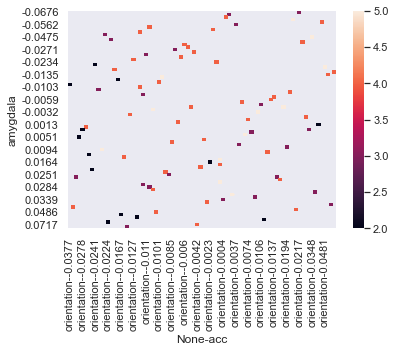

In [299]:
# 
result = df.pivot(index='amygdala', columns='acc')
sns.heatmap(result)

#### Ans:
The distribution shows unimodal - per countour plot, I see only one center and data is around that. the 2d histogram confirms the observation as well.

from the contour plot and histogram it is not ver clear if there are any outliers as the kde plot shape is not too distotrted or stretched.

The KDE plot shows evenly distributes data with circular contours, which is generally an indication of independent and uncorelated datasets. To confirm the indepndence we will have to apply and check conditional distribution of the variables to see if the probablity of the variable stays same regardless of the values /probablities of the other.

#### Q2.d

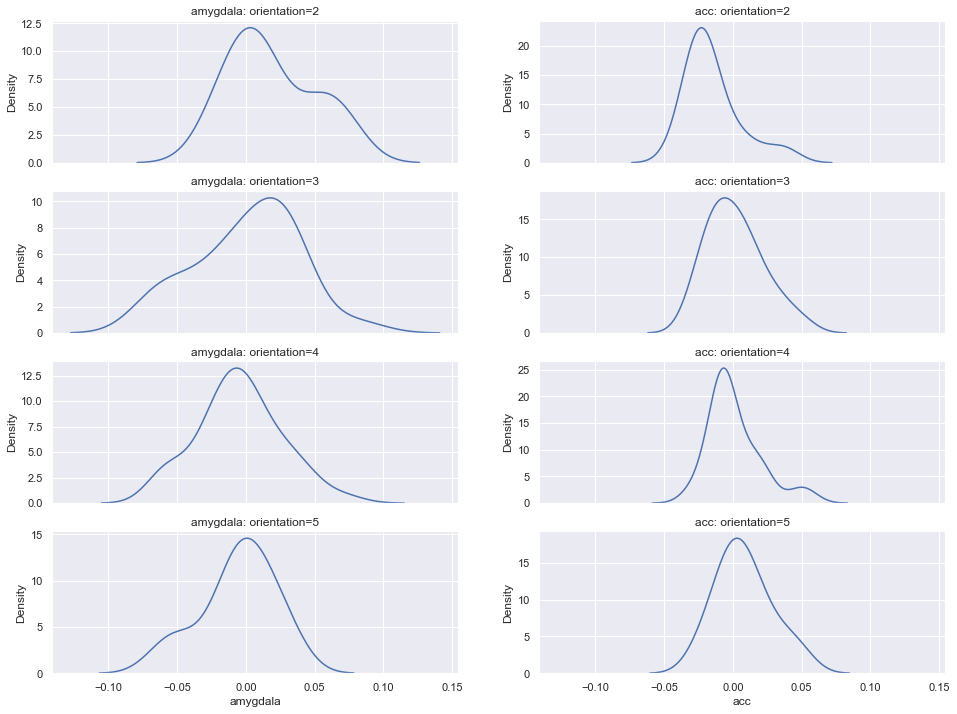

In [294]:
#df.loc[df['orientation'] == 3]
#df[orientation == 3]

fig,axes=plt.subplots(4,2,figsize=(16,12),sharex=True)

#sns.displot(ax=axes[0][0],data=df.loc[df['orientation'] == 3],x='amygdala', kind='kde')

# sns.displot(ax=axes[r][0],data=df[orientation == orientation],x='amygdala', kind='kde')
for r,orientation in enumerate([2,3,4,5]):
    sns.kdeplot(ax=axes[r,0],data=df.loc[df['orientation'] == orientation], x='amygdala',).set(title=f"amygdala: orientation={orientation}")
    sns.kdeplot(ax=axes[r,1],data=df.loc[df['orientation'] == orientation], x='acc', ).set(title=f"acc: orientation={orientation}")

#### Ans:
The distribution of data both for amygdala and acc varies based on what olitical view they subscribe to. If the brainshapes were not conditional to orientation, we would see much similar shape close to normal distribution across all political orientation.

In [295]:
df.groupby('orientation').mean().transpose()

orientation,2,3,4,5
amygdala,0.019062,0.000588,-0.00472,-0.005692
acc,-0.014769,0.001671,0.00131,0.008142


#### Q2.e

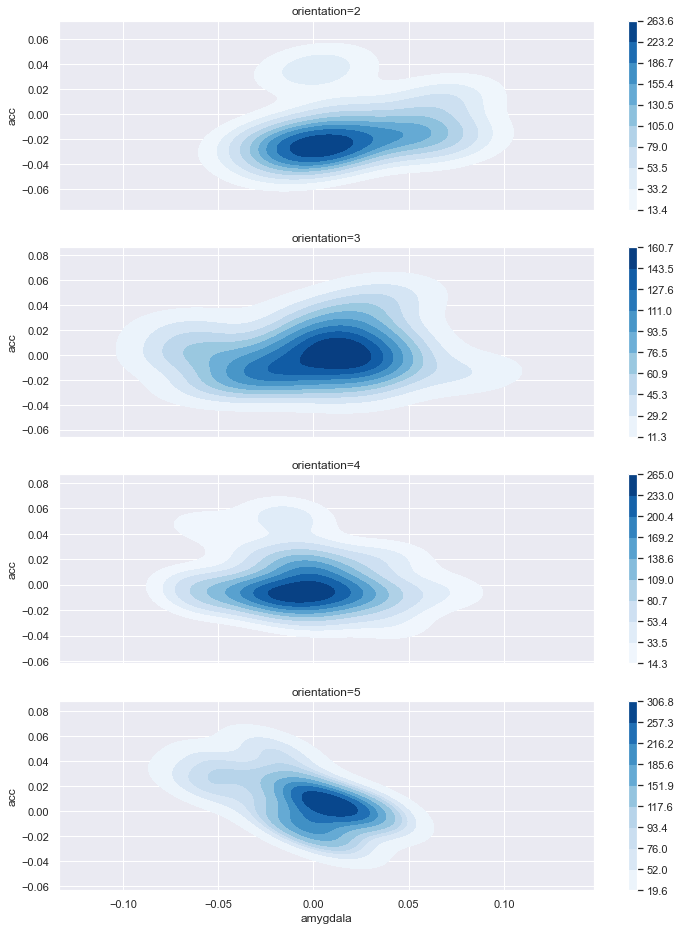

In [296]:
#df.loc[df['orientation'] == 3]
#df[orientation == 3]

fig,axes=plt.subplots(4,1,sharex=True,figsize=(12,16))

#sns.displot(ax=axes[0][0],data=df.loc[df['orientation'] == 3],x='amygdala', kind='kde')

# sns.displot(ax=axes[r][0],data=df[orientation == orientation],x='amygdala', kind='kde')
for r,orientation in enumerate([2,3,4,5]):
    sns.kdeplot(ax=axes[r],data=df.loc[df['orientation'] == orientation], x='amygdala',y='acc',color='r', shade=True,
            cmap="Blues",cbar=True).set(title=f"orientation={orientation}")
    #sns.kdeplot(ax=axes[r,1],data=df.loc[df['orientation'] == orientation], x='acc', ).set(title=f"acc: orientation={orientation}")

#### Ans:
The conditional distribution for different orientation looks different for different orientation.
for orientation 5 and 4 has some un-uniforma data whereas for orintation 2 is shows almost having bimodal distribution.

### Q3

### Q3.a

#### EM Computation Steps with Expressions
LoopIterate until the distance to the center (mean) of component is LESS than the previous iteration. \
#### Iterate EM
For i = 1..maxiterations



#### E - step
$\quad$For i = 1..K\
$\quad\quad$ $\tau(i,k) = \pi_k * 1/\sqrt(|\varepsilon_k|) * e^{-1/2(x_i - \mu_k)^T\varepsilon{-1}{k}}$ (Probability Density Function)\
$\quad$ForEnd\
$\quad$$C=\sum_{k=1}^{k}\ \tau(i,k)$\
$\quad$$\tau(i,k)\ \gets var(i,k)/C$



#### M - step
$\quad$For i = 1..K\
$\quad\quad$$\pi_k \gets \frac{1}{m} \sum_{i=1}^{m} \tau(i,k)$\
\
$\quad\quad$$\mu_k \gets \frac{\sum_{i=1}^{m}{\tau(i,k)x^i}}{\sum_{i=1}^{m}{\tau(i,k)}} $\
$\quad\quad$$\varepsilon_k$\
$\quad$ForEnd\
\
ForEndIteration

#### Q2.b

In [300]:
from scipy.io import loadmat
from PIL import Image

data=loadmat("data/data.mat")
data=data['data']
data.shape

(784, 1990)

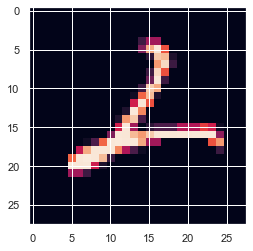

In [301]:
plt.imshow(data[:,3].reshape(28,28).T)

#### Load data and apply PCA to reduce dimensionality to 4

In [303]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

from scipy.io import loadmat
from PIL import Image
np.random.seed(4)


data=loadmat("data/data.mat")
data=data['data']
data.shape

data=data.T
#data=StandardScaler().fit_transform(data)
data=StandardScaler().fit_transform(data)
C=np.matmul(data.T,data)/data.shape[0]

# pca=PCA(n_components=4)
# pdata=pca.fit_transform(data)

#PCA the data
d = 4  # reduced dimension
V,S,_ = np.linalg.svd(C)
V = V[:, :d]
S=  S[:4]



# project the data to the top 4 principal directions
pdata = np.dot(data,V)

m,n = pdata.shape

# 2 mixture
K=2

print(m,n)
# print(V.shape,S.shape,s.shape)
# X=np.diag(S)
# print(X.shape)

1990 4


#### Initialization bloc

In [304]:
import numpy as np
import scipy as sp

def initialize_cov(n):
    S=np.random.normal(loc=0,scale=1,size=(n,n)) # loc is mean , scale = std. dev
    I=np.identity(n)
    return S.dot(S.T)+I

def initialize(K,n):
    sig=[]
    pi = np.random.random(K)
    pi = pi/np.sum(pi)  
    mu = np.random.randn(K,n)

    for i in range(1,K+1):
        sig.append(initialize_cov(n))
    return pi,mu,sig


In [305]:
pi,mu,sigma=initialize(K,4)
# initialize the posterior
tau = np.full((m, K), fill_value=0.)
plt.ion()
print(pi.shape,mu.shape,len(sigma),len(sigma[0]),tau.shape)
print(pi)

(2,) (2, 4) 2 4 (1990, 2)
[0.63861457 0.36138543]


In [306]:
x = np.full((1990, 2), fill_value=0.)
x.shape

(1990, 2)

In [307]:
mu_old = mu.copy()
maxiter=200
likelihood=[]

for ii in range(500):

    # E-step    
    for kk in range(K):
        tau[:, kk] = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])
    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (m,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, K)))
    likelihood.append(np.sum(np.log(sum_tau)))
    
    
    # M-step
    for kk in range(K):
        # update prior
        pi[kk] = np.sum(tau[:, kk])/m
        
        # update component mean
        mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        # update cov matrix
        dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
        
    print('-----iteration---',ii)    
    #print(pdata.shape,tau.shape)
    print('mu diff :',np.linalg.norm(mu-mu_old))
#     plt.scatter(pdata[:,0], pdata[:,1], c=tau)
#     plt.axis('scaled')
#     plt.draw()
#     plt.pause(0.1)
    if np.linalg.norm(mu-mu_old) < tol:
        print('training coverged')
        break
    mu_old = mu.copy()
    if ii==maxiter:
        print('max iteration reached')
        break

-----iteration--- 0
mu diff : 3.139089364373176
-----iteration--- 1
mu diff : 2.017597193789337
-----iteration--- 2
mu diff : 1.6993453713476812
-----iteration--- 3
mu diff : 1.4427718641010014
-----iteration--- 4
mu diff : 1.0928791422410673
-----iteration--- 5
mu diff : 0.5470398196748789
-----iteration--- 6
mu diff : 0.20651791056309476
-----iteration--- 7
mu diff : 0.08283063037755795
-----iteration--- 8
mu diff : 0.04392246080825545
-----iteration--- 9
mu diff : 0.026725001609118327
-----iteration--- 10
mu diff : 0.017378190582863925
-----iteration--- 11
mu diff : 0.012054439007793627
-----iteration--- 12
mu diff : 0.008914276335235635
-----iteration--- 13
mu diff : 0.006947429533447577
-----iteration--- 14
mu diff : 0.005617346221994908
-----iteration--- 15
mu diff : 0.004649528850132773
-----iteration--- 16
mu diff : 0.003903719487275476
-----iteration--- 17
mu diff : 0.003305627929060444
-----iteration--- 18
mu diff : 0.0028134037638028295
-----iteration--- 19
mu diff : 0.00240

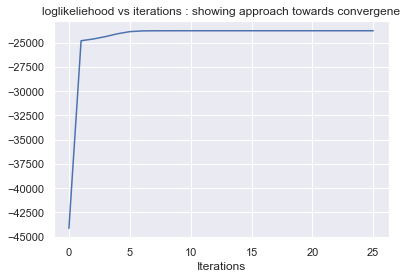

In [308]:
plt.plot(likelihood)
plt.xlabel("Iterations")
plt.title("loglikeliehood vs iterations : showing approach towards convergene")
plt.show()

#### Q3.c

In [309]:
for i in range (2):
    print("###"*20)
    print(f"\n\nThe pi-value for gaussian distribution {i+1} is :{pi[i]}")
    print(f"\n\nThe mean/mu vector for gaussian distribution {i+1} for the 4 components is :{mu[i]}")
    print(f"\n\nThe covariance(sigma) metrics related to gaussian distribution {i+1} for the 4 components is :\n{sigma[i]}")

############################################################


The pi-value for gaussian distribution 1 is :0.41220869272313865


The mean/mu vector for gaussian distribution 1 for the 4 components is :[ 5.64339245  3.03365839  0.73096548 -0.02647003]


The covariance(sigma) metrics related to gaussian distribution 1 for the 4 components is :
[[ 11.95822313 -10.35574376  -3.08028552   8.79836628]
 [-10.35574376  25.47465935  -2.08329714  -5.53392621]
 [ -3.08028552  -2.08329714   7.81538376  -3.51902675]
 [  8.79836628  -5.53392621  -3.51902675  12.27538204]]
############################################################


The pi-value for gaussian distribution 2 is :0.5877913072768614


The mean/mu vector for gaussian distribution 2 for the 4 components is :[-3.95762134 -2.12745637 -0.51261446  0.01856301]


The covariance(sigma) metrics related to gaussian distribution 2 for the 4 components is :
[[ 24.96404248 -13.16341956  -2.76146331  -5.99193059]
 [-13.16341956  26.35426268  -1.184

In [310]:
## showing the mean picture
print(V.shape)
print(np.diag(S).shape)
print((mu.T).shape)

#reconstructing mean vector
r_mean = V@np.power(np.diag(S),.5)@mu.T
print(r_mean.shape)

(784, 4)
(4, 4)
(4, 2)
(784, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

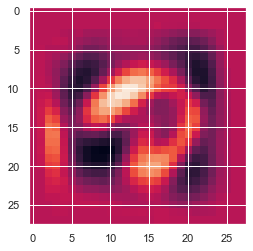

In [311]:
plt.imshow(r_mean[:,0].reshape((28,28)))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

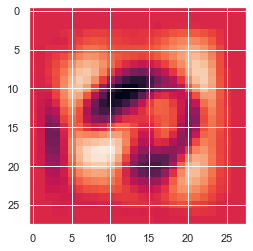

In [312]:
plt.imshow(r_mean[:,1].reshape((28,28)))
plt.show

#### Q3.d

In [313]:
# load the label data
import os
from scipy.io import loadmat
file=os.path.join('data','label.mat')
label=loadmat(file)
label=label['trueLabel']

In [314]:
import pandas as pd
tauDF=pd.DataFrame(tau,columns=['p1','p2'])
tauDF['gmmLabel']=np.where(tauDF['p1'] > .5,'6','2')
tauDF

,p1,p2,gmmLabel
0,2.270846e-10,1.000000,2
1,1.283830e-17,1.000000,2
2,1.383780e-02,0.986162,2
3,9.344928e-02,0.906551,2
4,4.884446e-02,0.951156,2
...,...,...,...
1985,9.935456e-01,0.006454,6
1986,9.953948e-01,0.004605,6
1987,9.812359e-01,0.018764,6
1988,9.995938e-01,0.000406,6


In [315]:
tauDF['actualLabel'] = label[0].tolist()
tauDF

,p1,p2,gmmLabel,actualLabel
0,2.270846e-10,1.000000,2,2
1,1.283830e-17,1.000000,2,2
2,1.383780e-02,0.986162,2,2
3,9.344928e-02,0.906551,2,2
4,4.884446e-02,0.951156,2,2
...,...,...,...,...
1985,9.935456e-01,0.006454,6,6
1986,9.953948e-01,0.004605,6,6
1987,9.812359e-01,0.018764,6,6
1988,9.995938e-01,0.000406,6,6


In [316]:
z=pd.crosstab(tauDF['gmmLabel'],tauDF['actualLabel'])
z

actualLabel,2,6
gmmLabel,,
2,1002,160
6,30,798


In [317]:
print(f"Misclassification rate for 2 : {30/(1002+30)}")
print(f"Misclassification rate for 6 : {160/(160+798)}")

Misclassification rate for 2 : 0.029069767441860465
Misclassification rate for 6 : 0.16701461377870563


In [318]:
from sklearn.cluster import KMeans
km = KMeans(init='random',n_clusters =2)

In [319]:
kmeans=km.fit(data)

In [320]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [321]:
tauDF['kmeansLabel']=kmeans.labels_.tolist()
tauDF['kmeansLabel']=np.where(tauDF['kmeansLabel'] == 0 , '2','6')
tauDF

,p1,p2,gmmLabel,actualLabel,kmeansLabel
0,2.270846e-10,1.000000,2,2,6
1,1.283830e-17,1.000000,2,2,6
2,1.383780e-02,0.986162,2,2,6
3,9.344928e-02,0.906551,2,2,6
4,4.884446e-02,0.951156,2,2,6
...,...,...,...,...,...
1985,9.935456e-01,0.006454,6,6,2
1986,9.953948e-01,0.004605,6,6,2
1987,9.812359e-01,0.018764,6,6,2
1988,9.995938e-01,0.000406,6,6,2


In [322]:
zk=pd.crosstab(tauDF['kmeansLabel'],tauDF['actualLabel'])
zk

actualLabel,2,6
kmeansLabel,,
2,66,937
6,966,21


In [323]:
print(f"Misclassification rate for 2 : {73/(959+73)}")
print(f"Misclassification rate for 6 : {16/(16+942)}")

Misclassification rate for 2 : 0.07073643410852713
Misclassification rate for 6 : 0.016701461377870562


In [324]:
print(f"Overall misclassification for KMeans : {(73+16)/1990}")
print(f"Overall misclassification for GMM :    {(30+160)/1990}")

Overall misclassification for KMeans : 0.04472361809045226
Overall misclassification for GMM :    0.09547738693467336


#### From Above overall misclaafication it appears in this case kmeans performs better. For GMM with possibly more data point the gaussian distribution parameter would be more well tuned. Also, with more cluster the probabilistc model of gaussian mixture may perform better

### END